<a href="https://colab.research.google.com/github/otwn/Geospatial-Analysis-Examples/blob/master/GeoPandas_Plot_and_CRS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Geospatial Analysis
This is based on Kaggle.com/geospaital analysis course 

# Setup

In [ ]:
import subprocess

# GeoPandas
try:
    import geopandas as gpd
except ImportError:
    print('geopandas package not installed. Installing ...')
    subprocess.check_call(["python", '-m', 'pip', 'install', 'geopandas'])
    import geopandas as gpd


# Geemap
try:
    import geemap
except ImportError:
    print('geemap package not installed. Installing ...')
    subprocess.check_call(["python", '-m', 'pip', 'install', 'geemap'])

# Google Colab
try: 
  import google.colab
  import geemap.eefolium as emap
except:
  import geemap as emap

# Authenticates and initializes Earth Engine
import ee

try:
    ee.Initialize()
except Exception as e:
    ee.Authenticate()
    ee.Initialize()    

     |████████████████████████████████| 972kB 7.3MB/s 
     |████████████████████████████████| 14.7MB 205kB/s 
     |████████████████████████████████| 10.9MB 26.3MB/s 


# Datasets

In [ ]:
# original source is available at https://www.kaggle.com/alexisbcook/geospatial-learn-course-data?
data = gpd.read_file("/content/drive/My Drive/Colab Notebooks/Geospatial/kiva_loans/kiva_loans.shp")

In [ ]:
data.head()

,Partner ID,Field Part,sector,Loan Theme,country,amount,geometry
0,9,KREDIT Microfinance Institution,General Financial Inclusion,Higher Education,Cambodia,450,POINT (102.89751 13.66726)
1,9,KREDIT Microfinance Institution,General Financial Inclusion,Vulnerable Populations,Cambodia,20275,POINT (102.98962 13.02870)
2,9,KREDIT Microfinance Institution,General Financial Inclusion,Higher Education,Cambodia,9150,POINT (102.98962 13.02870)
3,9,KREDIT Microfinance Institution,General Financial Inclusion,Vulnerable Populations,Cambodia,604950,POINT (105.31312 12.09829)
4,9,KREDIT Microfinance Institution,General Financial Inclusion,Sanitation,Cambodia,275,POINT (105.31312 12.09829)


In [ ]:
type(data)

geopandas.geodataframe.GeoDataFrame

In [ ]:
# Pick up some columns
data_part = data.loc[:, ["Loan Theme", "country","geometry"]].copy()

In [ ]:
# Count the number of each country 
data_part.country.value_counts()

Philippines      3083
Armenia           942
Colombia          822
Mexico            615
Kenya             568
                 ... 
Cote D'Ivoire       1
Bhutan              1
Suriname            1
South Sudan         1
Benin               1
Name: country, Length: 79, dtype: int64

In [ ]:
# pickup "Philippines" and "Armenia" area
top_three = data_part.loc[data_part.country.isin(["Philippines", "Armenia","Colombia"])].copy()
top_three.head()

,Loan Theme,country,geometry
2859,General,Philippines,POINT (121.73961 17.64228)
2860,General,Philippines,POINT (121.74169 17.63235)
2861,General,Philippines,POINT (121.46667 16.60000)
2862,General,Philippines,POINT (121.73333 17.83333)
2863,General,Philippines,POINT (121.51800 16.72368)


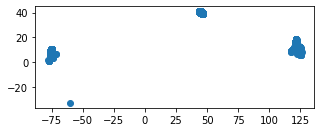

In [ ]:
top_three.plot()

In [ ]:
# gpd has own world map
world_filepath = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file(world_filepath)
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


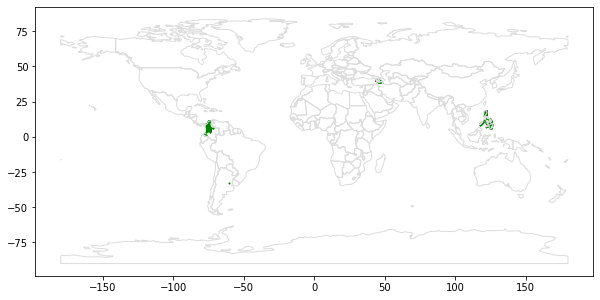

In [ ]:
ax = world.plot(figsize=(10,10), color='none', edgecolor='gainsboro', zorder=3)
top_three.plot(color="green", markersize=1, ax=ax)

In [ ]:
# focus on Philippines
PHL_loans = data.loc[data.country=="Philippines"].copy()

In [ ]:
# Load a KML file containing island boundaries
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
PHL = gpd.read_file("/content/drive/My Drive/Colab Notebooks/Geospatial/Philippines_AL258.kml", driver='KML')
PHL.head()

,Name,Description,geometry
0,Autonomous Region in Muslim Mindanao,,"MULTIPOLYGON (((119.46690 4.58718, 119.46653 4..."
1,Bicol Region,,"MULTIPOLYGON (((124.04577 11.57862, 124.04594 ..."
2,Cagayan Valley,,"MULTIPOLYGON (((122.51581 17.04436, 122.51568 ..."
3,Calabarzon,,"MULTIPOLYGON (((120.49202 14.05403, 120.49201 ..."
4,Caraga,,"MULTIPOLYGON (((126.45401 8.24400, 126.45407 8..."


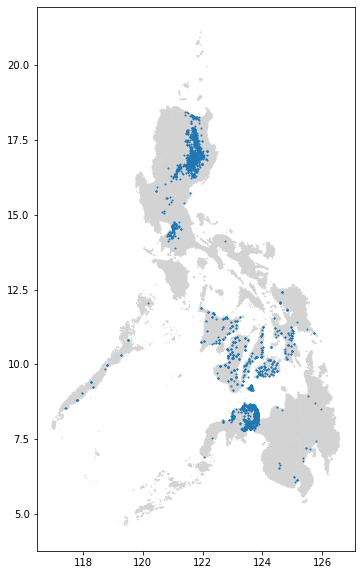

In [ ]:
ax = PHL.plot(figsize=(10,10), color="lightgray", linestyle=':', edgecolor='lightgray')
PHL_loans.plot(markersize=1, ax=ax)


# Another example: Make a NY state map quickly 

In [ ]:
# Campsites in New York state (Point)
POI_data = gpd.read_file("/content/drive/My Drive/Colab Notebooks/Geospatial/DEC_pointsinterest/Decptsofinterest.shp")
campsites = POI_data.loc[POI_data.ASSET=='PRIMITIVE CAMPSITE'].copy()

In [ ]:
# Foot trails in New York state (LineString)
roads_trails = gpd.read_file("/content/drive/My Drive/Colab Notebooks/Geospatial/DEC_roadstrails/Decroadstrails.shp")
trails = roads_trails.loc[roads_trails.ASSET=='FOOT TRAIL'].copy()

In [ ]:
# County boundaries in New York state (Polygon)
counties = gpd.read_file("/content/drive/My Drive/Colab Notebooks/Geospatial/NY_county_boundaries/NY_county_boundaries.shp")

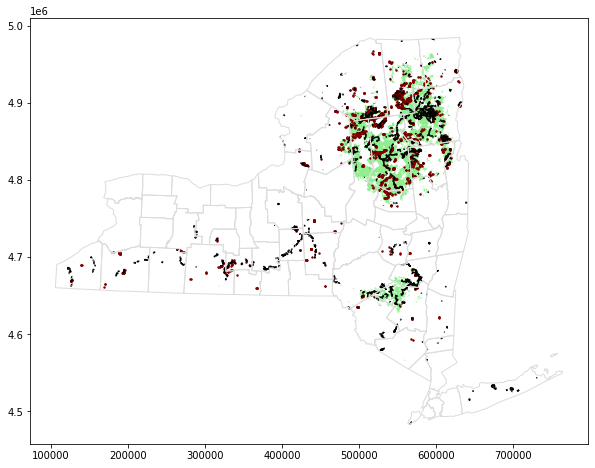

In [ ]:
bd = counties.plot(figsize=(10,10), color='none', edgecolor="gainsboro", zorder=3)

# add wild lands, campsites, and foot trails to the "base map" above
wild_lands.plot(color="lightgreen", ax=bd)
campsites.plot(color="maroon", markersize=2, ax=bd)
trails.plot(color="black", markersize=1, ax=bd)

# Make a map from CSV
* It requires CRS setting (map projection)
* Use both Pandas and GeoPandas

In [ ]:
import pandas as pd

In [ ]:
# health facilities in Ghana
facilities_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Geospatial/ghana/health_facilities.csv")
print(facilities_df.head())

# convert the DataFrame to a GeoDataFrame
facilities = gpd.GeoDataFrame(facilities_df, geometry=gpd.points_from_xy(facilities_df.Longitude, facilities_df.Latitude))

# Set the coordinate reference system (CRS) to EPSG 4326 (aka WGS84)
facilities.crs = {"init": "epsg:4326"}

# make sure 'geometry' column is generated
facilities.head()

    Region          District  ... Latitude Longitude
0  Ashanti     Offinso North  ...  7.40801  -1.96317
1  Ashanti  Bekwai Municipal  ...  6.46312  -1.58592
2  Ashanti      Adansi North  ...  6.22393  -1.34982
3  Ashanti     Afigya-Kwabre  ...  6.84177  -1.61098
4  Ashanti            Kwabre  ...  6.84177  -1.61098

[5 rows x 8 columns]


/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude,geometry
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317,POINT (-1.96317 7.40801)
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592,POINT (-1.58592 6.46312)
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982,POINT (-1.34982 6.22393)
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098,POINT (-1.61098 6.84177)
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098,POINT (-1.61098 6.84177)


## Sometimes you need to re-project 
* in case you need to focus on distance
* in case you need to focus on area
* in case you need to focus on shape

### GeoPandas is taking care of it easily by using ```to_crs()``` method

In [ ]:
# Create a Ghana map
ghana = gpd.read_file("/content/drive/My Drive/Colab Notebooks/Geospatial/ghana/Regions/Map_of_Regions_in_Ghana.shp")

# Make sure the orinal crs
ghana.crs

<Projected CRS: EPSG:32630>
Name: WGS 84 / UTM zone 30N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World - N hemisphere - 6°W to 0°W - by country
- bounds: (-6.0, 0.0, 0.0, 84.0)
Coordinate Operation:
- name: UTM zone 30N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

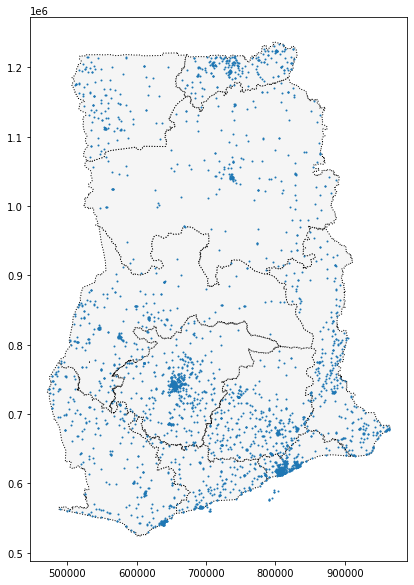

In [ ]:
# Change the CRS of facilities to EPSG:32630
# The to_crs() method modifies only the "geometry" column: all other columns are left as-is.

ax = ghana.plot(figsize=(10,10), color='whitesmoke', linestyle=':', edgecolor="black")
facilities.to_crs("EPSG:32630").plot(markersize=1, ax=ax)

In [ ]:
# Change the CRS of Ghana to EPSG 4326 (WGS84)
ghana.to_crs("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs").head()

,Region,geometry
0,Ashanti,"POLYGON ((-1.30985 7.62302, -1.30786 7.62198, ..."
1,Brong Ahafo,"POLYGON ((-2.54567 8.76089, -2.54473 8.76071, ..."
2,Central,"POLYGON ((-2.06723 6.29473, -2.06658 6.29420, ..."
3,Eastern,"POLYGON ((-0.21751 7.21009, -0.21747 7.20993, ..."
4,Greater Accra,"POLYGON ((0.23456 6.10986, 0.23484 6.10974, 0...."


In [ ]:
# Calculate the area (in square meters) of each polygon
ghana.loc[:,"AREA"] = ghana.geometry.area/10**6
print("Area of Ghana: {} square kilometers".format(ghana.AREA.sum()))
print("CRS:", ghana.crs)

Area of Ghana: 239584.5760055668 square kilometers
CRS: epsg:32630
